# 08.04 정규분포와 중심극한정리

```

    [참고 : 난수 생성 numpy]
    - np.random.rand : 균일분포 상 난수 생성
    - np.random.randn : 정규분포 상 난수 생성
    - np.random.randint : 균일분포 상 난수 1개 생성
    
    ```

## 1) 사이파이를 사용한 정규분포의 시뮬레이션


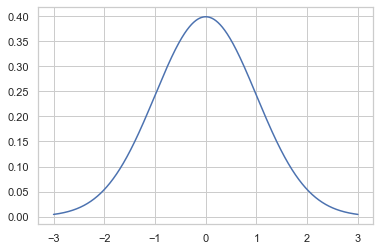

In [15]:
# 샘플링 없이 이론적 분포도 그리기 (pdf에 따라)

# 1. 확률변수 생성
mu = 0
std = 1
rv = sp.stats.norm(mu,std)

# 2. 확률변수값 생성
xx = np.linspace(-3,3,1000)

# 3. 확률값 생성 -> 분포 그리기
plt.plot(xx,rv.pdf(xx))

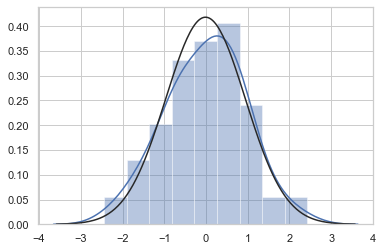

In [20]:
# 샘플링 통해 정규분포도 그리기

# 1. 확률변수 생성
mu = 0
std = 1
rv = sp.stats.norm(mu,std)

# 2. 샘플링
x = rv.rvs(100)

# 3. 분포도 그리기
sns.distplot(x, kde=True, fit=sp.stats.norm)

## 2) 예제 : 주식 수익률

    - 과거 약 10년 간의 나스닥 주식 수익률

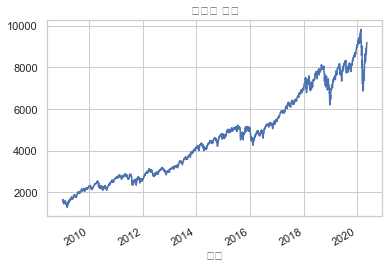

In [22]:
import pandas_datareader.data as web

symbol = "NASDAQCOM"
data = pd.DataFrame()
data[symbol] = web.DataReader(
    symbol, data_source="fred", start="2009-01-01", end="2020-05-11")[symbol]
data = data.dropna()
data.plot(legend=False)
plt.xlabel("날짜")
plt.title("나스닥 지수")
plt.show()

In [23]:
daily_returns = data.pct_change().dropna()
mean = daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print("평균 일간수익률: {:3.2f}%".format(mean * 100))
print("평균 일간변동성: {:3.2f}%".format(std * 100))

평균 일간수익률: 0.07%
평균 일간변동성: 1.27%


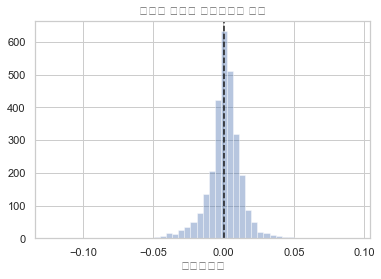

In [31]:
sns.distplot(daily_returns, kde=False)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls="--")
plt.ylim(0, ymax)
plt.title("나스닥 지수의 일간수익률 분포")
plt.xlabel("일간수익률")
plt.show()

## 3) Q-Q 플롯

    - 표본 데이터가 정규분포를 따르는지 분포 모양을 토대로 확인
    - 표본값 ==> 위치값 ==> 분위수(위치값(y)을 갖기 위한 이론적 x값) ==> Q-Q (표본값 vs 분위수)
    
```


1. 표본 데이터를 정렬(sort, ordering)

2. 하나하나의 표본 데이터가 전체 데이터 중의 몇 % 정도에 해당하는지 위칫값을 구한다. 위칫값으로는 특정 순위(order)의 값이 나타날 가능성이 높은 값을 뜻하는 순서통계량(order statistics)이라는 값을 이용한다.
   
3. 각 표본 데이터의 위칫값이 정규분포의 누적확률함수(cdf) 값이 되는 표준 정규분포의 표본값을 구한다. 즉 확률값에 대한 누적확률함수의 역함수 값을 구한다. 이를 표본 정규분포의 분위함수(quantile function)값이라고 한다. 예를 들어 표본 정규분포의 1%의 분위함수값은  𝐹−1(0.01) , 약 -2.326이다.

4. 정렬된 표본 데이터(ordered values)와 그에 대응하는 분위수(theoretical quantiles)를 하나의 쌍으로 간주하여 2차원 공간에 하나의 점(point)으로 그린다.

5. 모든 표본에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯을 완성한다.

```

In [41]:
# 1. 표본 데이터 정렬

data = np.random.normal(loc=0, scale=1, size = 100)
data_sorted = np.sort(data)

In [42]:
# 2. 위치값 구하기 (order statistics)

from scipy.stats.morestats import _calc_uniform_order_statistic_medians

position = _calc_uniform_order_statistic_medians(len(data))

In [44]:
# 3. 분위수(qf) 구하기 => 위치값 = 정규분포 cdf값 이 되는 표준정규분포의 표본값(x=qf)을 구하기
# cdf의 역함수 구하기 ex) cdf(x) = 위치값1, cdf(x2) = 위치값2
# 

rv = sp.stats.norm(0,1)
qf = rv.ppf(position)

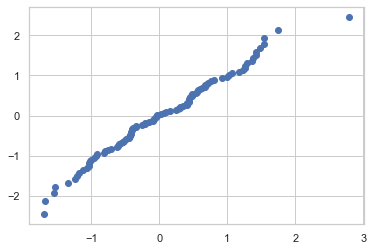

In [46]:
# 4. ordered value와 분위수

plt.scatter(data_sorted, qf)

## 3-1) Q-Q 플롯 패키지

    - sp.stats.probplot(  )

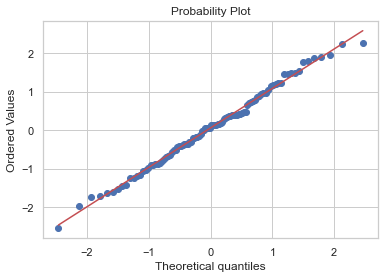

In [55]:
# 정규분포 데이터의 Q-Q 플롯

np.random.seed(0)
data = np.random.randn(100)
sp.stats.probplot(data,plot=plt)
plt.show()

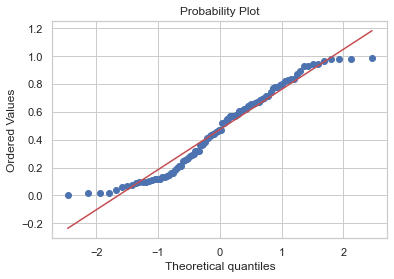

In [52]:
# 정규분포가 아닌 데이터의 Q-Q 플롯 : 데이터의 양 끝이 직선이 아닌 휘어진 상태

np.random.seed(0)
x_unif = np.random.rand(100)
sp.stats.probplot(x_unif,plot=plt)
plt.show()

## 3-2) 예제

```

정규분포로부터 나온  𝑁 개의 표본의 표본평균이 정규분포가 된다는 것을 시뮬레이션과 Q-Q 플롯을 사용하여 보여라.

(1)  𝑁=2 일 때

(2)  𝑁=10 일 때

```

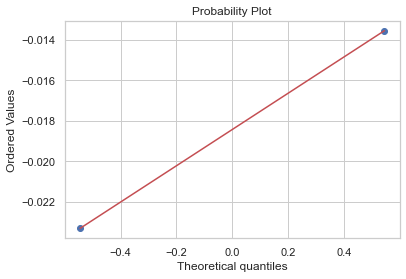

In [79]:
np.random.seed(0)
sample = np.random.randn(5000, 2)   # 2개의 표본뽑기를 5000번 시뮬레이션 한 것
sample_mean = sum(sample)/len(sample)  # 5000번 돌려서 얻은 각 표본평균이 나올 것
sp.stats.probplot(sample_mean,plot=plt)
plt.show()

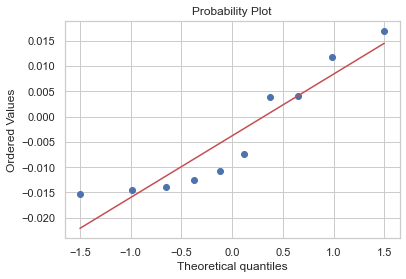

In [80]:
np.random.seed(0)
sample = np.random.randn(5000, 10)  # 10개의 표본뽑기를 5000번 시뮬레이션 한 것
sample_mean = sum(sample)/len(sample)  # 5000번 돌려서 얻은 각 표본평균이 나올 것
sp.stats.probplot(sample_mean,plot=plt)
plt.show()